<a href="https://colab.research.google.com/github/JCaballerot/Consultoria_ASEI/blob/main/Model_development/Miraflores/modelDevelopment_zona3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias



Cargamos las librerías que utilizaremos en el proyecto

In [ ]:
import pandas as pd

import warnings                                  
warnings.filterwarnings('ignore')

import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt                  
import seaborn as sns                            

from sklearn.metrics import *

In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend",  color='red')

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.xticks(rotation=90)

# Data

Importamos la información desde un archivo csv cargado en el file temporal y nos quedamos con los datos de la zona 2

In [ ]:
pddf = pd.read_csv('datos_miraflores.csv', index_col=['codmes'], parse_dates=['codmes']).fillna(0)
pddf = pddf[['Oferta_zona_3', 'Venta_zona_3']]


In [ ]:

macro = pd.read_csv('macros_corregido.csv', index_col=['codmes'], parse_dates=['codmes']).drop(columns=['imp_mater_const'])
variables_macro = macro.columns.tolist()

macro[variables_macro] = macro[variables_macro].shift(3)
macro.head()


,Tasas_interes_fondeo,tasa_interes_act,ind_prec_inm,ind_prec_med,ind_prec_alt,ind_prec_12_distr,ind_prec_cons_lima_met_alim_ener,prod_ener_lima,imp_bienes_cons_durarero,ind_coyunt_ener,ind_coyunt_ener_sin_mina,ind_coyun_cons_cement,var_porc_demanda_interna,var_porc_PBI,var_porc_PBI_const,ind_prec_inf_suby_bienes,ind_preci_import,exp_PBI,tip_camb_banc_venta,ind_tipo_camb_var_mes
codmes,,,,,,,,,,,,,,,,,,,,
ene-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feb-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mar-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abr-17,21.6,17.7,105.52,4833.035,6504.746721,6112.723641,85.673937,1923.560965,172.676142,4271.926740,3260.252779,-6.893539,0.553117,5.035927,-5.362123,0.173364,78.484838,0.040,3.341909,-1.291877
may-17,21.8,17.1,105.52,4833.035,6504.746721,6112.723641,86.130716,1644.130032,174.654742,3851.705216,2993.869714,-4.840555,-3.592399,0.799045,-7.147955,0.196265,78.343104,0.038,3.261850,-2.408776


In [ ]:
asei = pd.read_csv('variables_asei_new.csv', delimiter = ';', index_col=['codmes'], parse_dates=['codmes'])
variables_asei = asei.columns.tolist()

asei[variables_asei] = asei[variables_asei].shift(2)
asei.head()

,precio_oferta_zon1,precio_oferta_zon2,precio_oferta_zon3,precio_oferta_total,precio_venta_zon1,precio_venta_zon2,precio_venta_zon3,precio_venta_total,flg_feia
codmes,,,,,,,,,
ene-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feb-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mar-17,10783.8,6858.5,6383.7,7769.2,9988.6,6713.3,6247.3,7559.8,0.0
abr-17,10849.9,6872.5,6582.3,7659.7,7705.2,6727.4,5948.4,6728.1,0.0
may-17,10113.6,7084.4,6589.4,7719.3,10593.4,7136.1,6041.6,7605.2,0.0


In [ ]:
pddf2 = pd.merge(pddf, macro, on = 'codmes', how='left').copy()
pddf2 = pd.merge(pddf2, asei, on = 'codmes', how='left')

variables = variables_macro + variables_asei + ['Oferta_zona_3']


In [ ]:
pddfRes = pddf2.copy()

pddfRes[[x + '_avg3' for x in variables]] = pddfRes[variables].rolling(3, min_periods = 3).mean()
pddfRes[[x + '_avg6' for x in variables]] = pddfRes[variables].rolling(6, min_periods = 6).mean()

pddfRes = pddfRes.iloc[8:]

In [ ]:
for x in variables:
  pddfRes[x + '_rat3to6'] = pddfRes[x + '_avg3']/pddfRes[x + '_avg6']
  

# Forecasting

Muestreamos la data en train y test bajo metodología OOT

In [ ]:
pddfTS = pddf[['Venta_zona_3']].copy()

X_train = pddfTS[:-4]
X_test  = pddfTS[-4:]


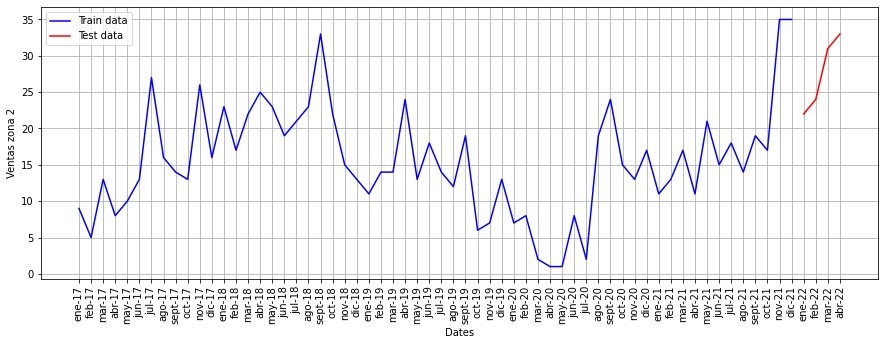

In [ ]:
#split data into train and training set
plt.figure(figsize=(15,5))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Ventas zona 2')
plt.plot(X_train, 'blue', label='Train data')
plt.plot(X_test, 'red', label='Test data')
plt.xticks(rotation=90)
plt.legend()

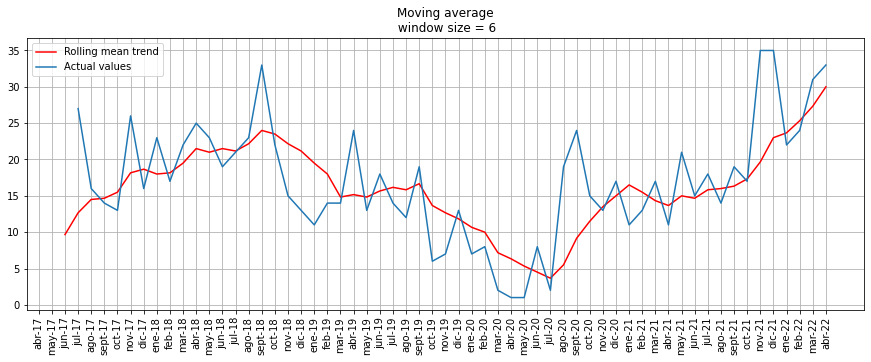

In [ ]:
plotMovingAverage(pddfTS['Venta_zona_3'], 6)

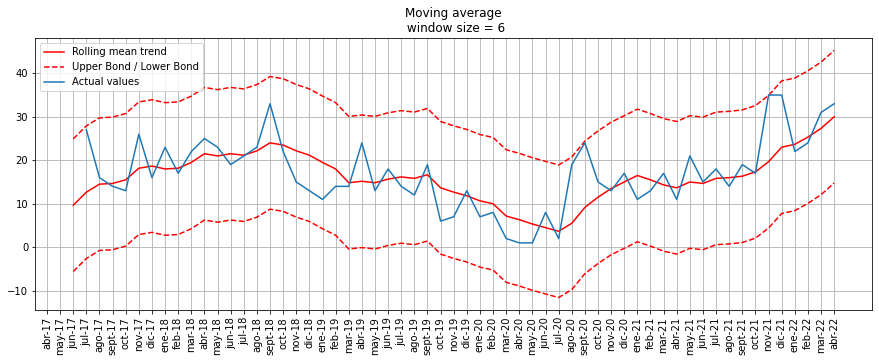

In [ ]:
plotMovingAverage(pddfTS['Venta_zona_3'], 6, plot_intervals=True, scale=1.96, plot_anomalies=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(X_train.Venta_zona_3.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.187086
p-value: 0.210966


Dado que el valor p es mayor que el nivel de significancia (0,05), diferenciemos las series y veamos cómo se ve el gráfico de autocorrelación.

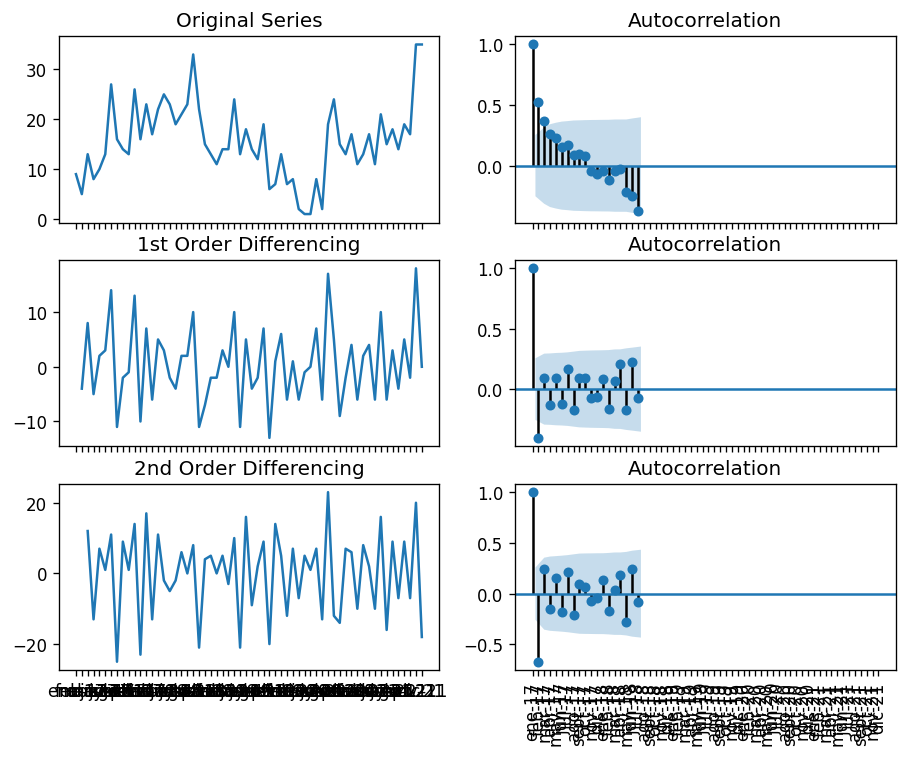

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(X_train.Venta_zona_3); axes[0, 0].set_title('Original Series')
plot_acf(X_train.Venta_zona_3, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(X_train.Venta_zona_3.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(X_train.Venta_zona_3.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(X_train.Venta_zona_3.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(X_train.Venta_zona_3.diff().diff().dropna(), ax=axes[2, 1])

plt.xticks(rotation=90)
plt.show()

Por los datos anteriores, podemos ver que la serie de tiempo alcanza la estacionariedad con dos órdenes de diferenciación.

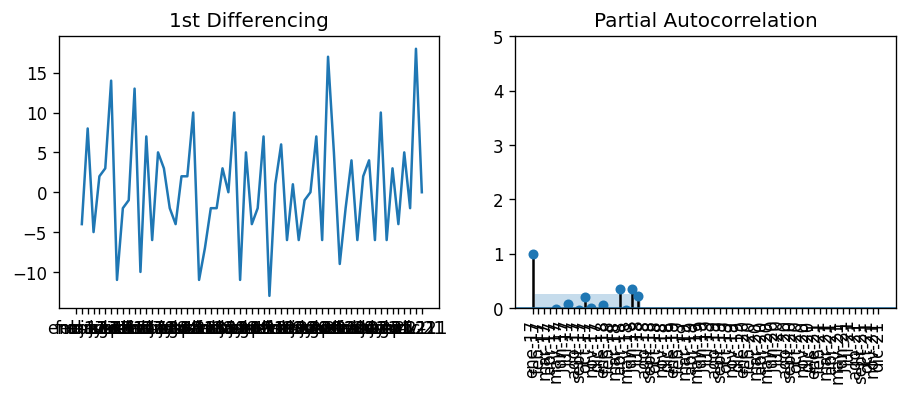

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(X_train.Venta_zona_3.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(X_train.Venta_zona_3.diff().dropna(), ax=axes[1])

plt.xticks(rotation=90)
plt.show()

Podemos ver que el retraso 1 de PACF es bastante significativo ya que está muy por encima de la línea de significancia. Entonces, fijaremos el valor de p como 1.

### MA (q) 

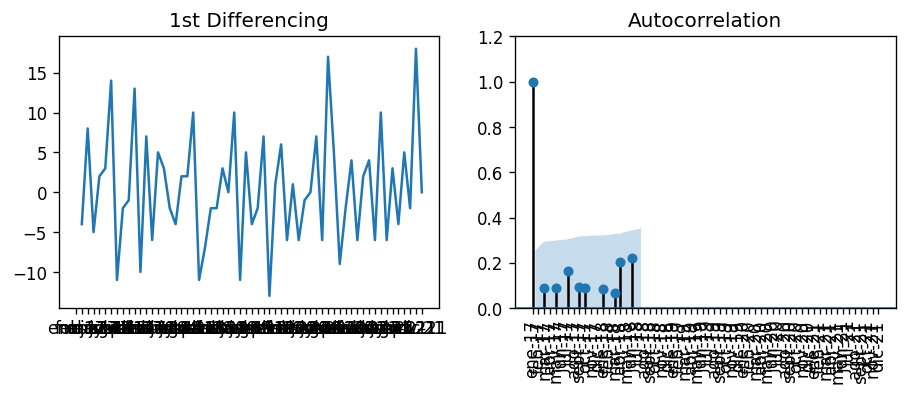

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(X_train.Venta_zona_3.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(X_train.Venta_zona_3.diff().dropna(), ax=axes[1])
plt.xticks(rotation=90)
plt.show()


Podemos ver que un 1 retraso están muy por encima de la línea de significación. Entonces, fijaremos q como 1. Si hay alguna duda, iremos con el modelo más simple que explica suficientemente la Y

### Arima

Ahora, hemos determinado los valores de p, d y q. Disponemos de todo lo necesario para adaptarse al modelo ARIMA. Usaremos la implementación ARIMA() en el paquete statsmodels.
(p,d,q)

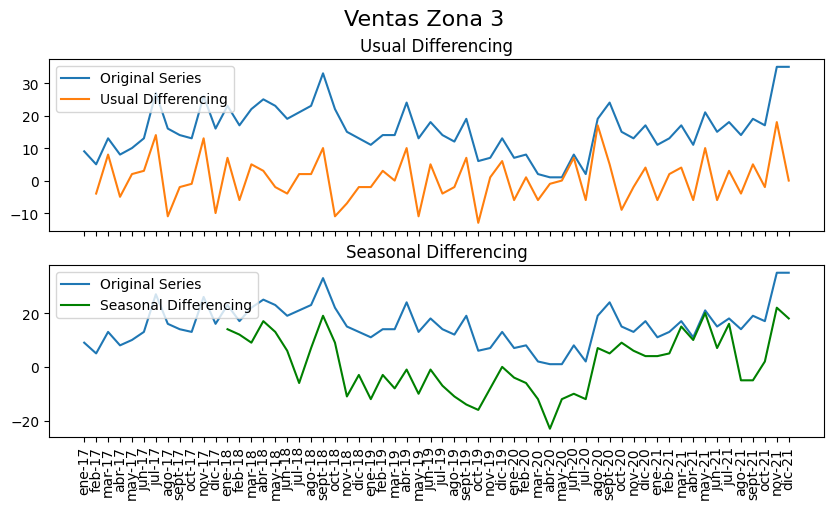

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(X_train.Venta_zona_3, label='Original Series')
axes[0].plot(X_train.Venta_zona_3.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(X_train.Venta_zona_3, label='Original Series')
axes[1].plot(X_train.Venta_zona_3.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Ventas Zona 3', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(X_train.Venta_zona_3, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.Venta_zona_3   No. Observations:                   58
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -192.143
Method:                       css-mle   S.D. of innovations              6.370
Date:                Wed, 22 Jun 2022   AIC                            392.286
Time:                        04:59:00   BIC                            400.528
Sample:                             2   HQIC                           395.496
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0212      0.035      0.598      0.553      -0.048       0.091
ar.L1.D2.Venta_zona_3    -0.3926      0.119     -3.291      0.002      -0.626      -0.159
ma.L1.D2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(X_train.Venta_zona_2, order=(1,1,1), seasonal_order = (1,1,1,12))
model_fit = model.fit(disp=0)
print(model_fit.summary())

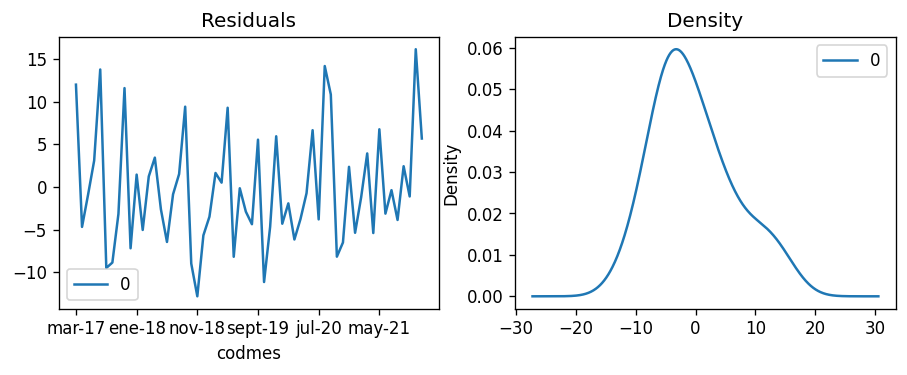

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Los errores residuales parecen correctos con una media cercana a cero y una varianza uniforme. Grafiquemos los valores reales contra los valores ajustados usando plot_predict().

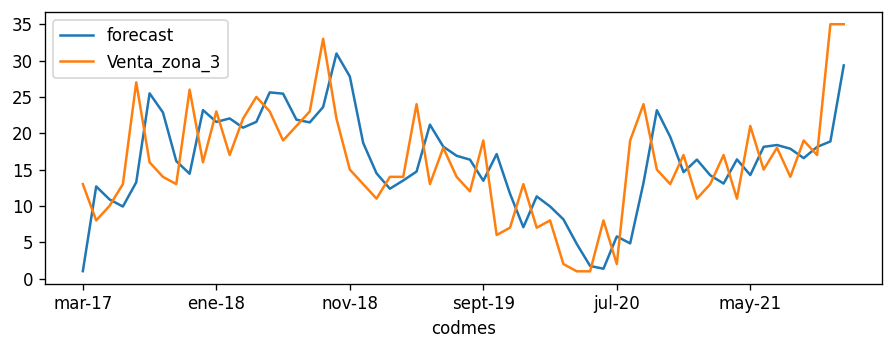

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

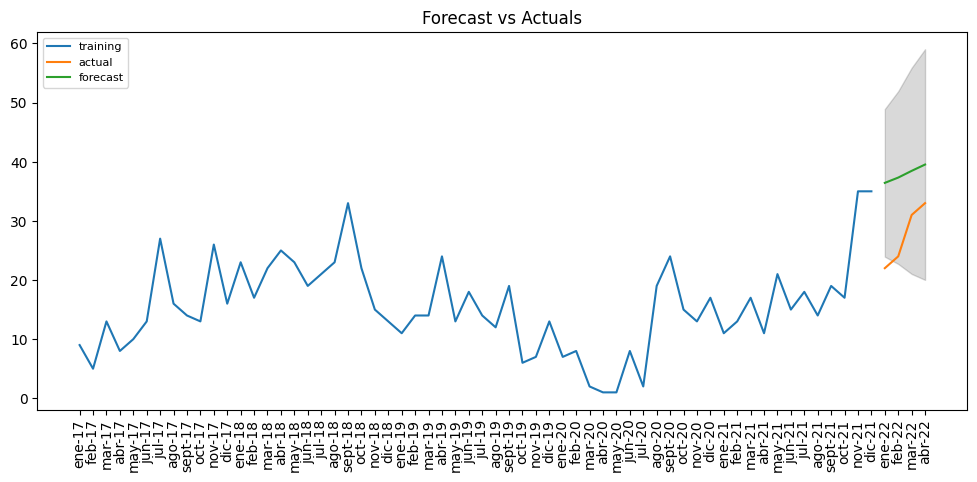

In [ ]:

# Forecast
fc, se, conf = model_fit.forecast(4, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=X_test.index)
lower_series = pd.Series(conf[:, 0], index=X_test.index)
upper_series = pd.Series(conf[:, 1], index=X_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(X_train, label='training')
plt.plot(X_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
fc, se, conf  = model_fit.forecast(10, alpha=0.05)
fc

array([36.42725548, 37.32369159, 38.45805798, 39.52853981, 40.65363105,
       41.7868104 , 42.94634234, 44.12505616, 45.3257671 , 46.54736989])

In [ ]:
model_res = model_fit.predict(start = 'mar-17' , end = 'dic-21', dynamic=False, typ = 'levels')

In [ ]:
pddfTS_res = pddfTS.copy()
pddfTS_res['venta_predicted'] = model_res

In [ ]:
fc, se, conf  = model_fit.forecast(4, alpha=0.05)

In [ ]:
pddfTS_res.iloc[-4:]['venta_predicted'] = fc

In [ ]:
pddfTS_res

,Venta_zona_3,venta_predicted
codmes,,
ene-17,9,NaN
feb-17,5,NaN
mar-17,13,1.021203
abr-17,8,12.680338
may-17,10,10.892532
...,...,...
dic-21,35,29.330568
ene-22,22,36.427255
feb-22,24,37.323692


# Regresión

In [ ]:
pddfReg = pddfRes.copy()
pddfReg['venta_predicted'] = pddfTS_res[['venta_predicted']].iloc[8:].venta_predicted

In [ ]:
target = 'Venta_zona_3'

total_features = variables +\
                 [x + '_avg3' for x in variables] +\
                 [x + '_avg6' for x in variables] +\
                 [x + '_rat3to6' for x in variables] + ['venta_predicted']

In [ ]:
X_train_reg = pddfReg[:-4]
X_test_reg  = pddfReg[-4:]

In [ ]:
correlations = pd.DataFrame()
data = X_train_reg.copy()

for col in total_features:
  data_temp = data[[target, col]]
  correlation = data_temp[col].corr(data_temp[target])
  temp = pd.DataFrame({'target': [target],'variable': [col], 'correlacion' : [correlation]})
  correlations = correlations.append(temp)

correlations['correlacion_abs'] = correlations.correlacion.apply(lambda x: abs(x))
correlations.sort_values(by = 'correlacion_abs', ascending = False, inplace = True)


In [ ]:
correlations.head(50)

,target,variable,correlacion,correlacion_abs
0,Venta_zona_3,venta_predicted,0.602546,0.602546
0,Venta_zona_3,ind_preci_import_rat3to6,0.473502,0.473502
0,Venta_zona_3,ind_prec_inf_suby_bienes_avg3,0.420908,0.420908
0,Venta_zona_3,ind_prec_inf_suby_bienes,0.406052,0.406052
0,Venta_zona_3,tasa_interes_act_rat3to6,-0.368252,0.368252
0,Venta_zona_3,var_porc_PBI_const_avg6,0.342501,0.342501
0,Venta_zona_3,ind_coyun_cons_cement_avg6,0.329631,0.329631
0,Venta_zona_3,flg_feia_rat3to6,0.325186,0.325186
0,Venta_zona_3,var_porc_demanda_interna_avg6,0.321711,0.321711
0,Venta_zona_3,var_porc_PBI_avg6,0.306679,0.306679


# Bivariado

### variables

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.precio_oferta_total_avg6)
plt.xlabel("venta pred", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

Text(0, 0.5, 'Venta_zona_2')

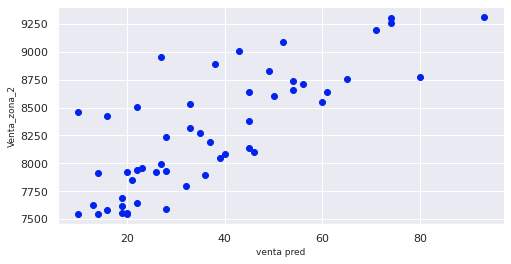

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.precio_oferta_total_avg6)
plt.xlabel("venta pred", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

Text(0, 0.5, 'Venta_zona_2')

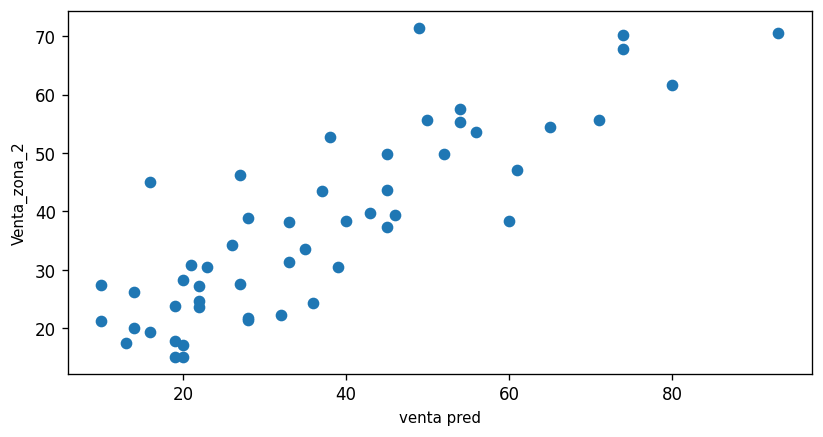

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.venta_predicted)
plt.xlabel("venta pred", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

### Tipo de cambio

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.tip_camb_banc_venta_avg3)
plt.xlabel("tip_camb_banc_venta_avg3", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

### Indice de precios de inmuebles 12 distritos de lima

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.ind_prec_12_distr_avg3)
plt.xlabel("ind_prec_12_distr_avg3", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

### Indice de precios al consumidor

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.ind_prec_cons_lima_met_alim_ener_avg3)
plt.xlabel("ind_prec_cons_lima_met_alim_ener_avg3", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

### Precio de inmuebles distritos altos

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.ind_prec_alt_avg3)
plt.xlabel("ind_prec_alt_avg3", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

### Tasa de interes

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.tasa_interes_act_avg6)
plt.xlabel("tasa_interes_act_avg6", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

### Oferta en Zona 2

Text(0, 0.5, 'Venta_zona_2')

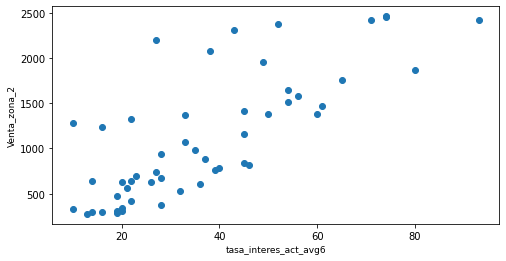

In [ ]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.Oferta_zona_2_avg6)
plt.xlabel("tasa_interes_act_avg6", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)

Text(0, 0.5, 'Venta_zona_2')

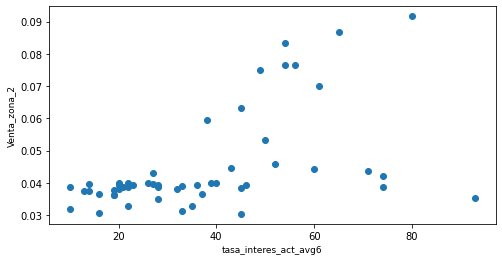

In [ ]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)

plt.scatter(X_train_reg.Venta_zona_2, X_train_reg.exp_PBI_avg3)
plt.xlabel("tasa_interes_act_avg6", fontsize=9)
plt.ylabel("Venta_zona_2", rotation=90, fontsize=9)


# Regresion

In [ ]:
X_train_reg_f = pddfReg[:-4][['Venta_zona_3','Oferta_zona_3_avg6', 'exp_PBI_avg3', 'ind_tipo_camb_var_mes_avg3',
             'tasa_interes_act_avg6', 
             'ind_prec_alt_avg3', 
             'ind_prec_cons_lima_met_alim_ener_avg3',
             'ind_prec_12_distr_avg3',
             'tip_camb_banc_venta_avg3','precio_oferta_total_avg6','flg_feia_avg3',
             'venta_predicted',
             'ind_preci_import_rat3to6', 'ind_prec_inf_suby_bienes_avg3','tasa_interes_act_rat3to6',
             'var_porc_PBI_const_avg6', 'var_porc_PBI_avg6', 'ind_tipo_camb_var_mes_avg6',
             'ind_prec_med_rat3to6', 'ind_prec_cons_lima_met_alim_ener_rat3to6',
             'precio_venta_total_rat3to6', 'tip_camb_banc_venta_avg3', 'ind_tipo_camb_var_mes_rat3to6',
             'precio_venta_total_avg3']]

X_test_reg_f = pddfReg[['Venta_zona_3','Oferta_zona_3_avg6', 'exp_PBI_avg3', 'ind_tipo_camb_var_mes_avg3',
             'tasa_interes_act_avg6', 
             'ind_prec_alt_avg3', 
             'ind_prec_cons_lima_met_alim_ener_avg3',
             'ind_prec_12_distr_avg3',
             'tip_camb_banc_venta_avg3','precio_oferta_total_avg6','flg_feia_avg3',
             'venta_predicted',
             'ind_preci_import_rat3to6', 'ind_prec_inf_suby_bienes_avg3','tasa_interes_act_rat3to6',
             'var_porc_PBI_const_avg6', 'var_porc_PBI_avg6', 'ind_tipo_camb_var_mes_avg6',
             'ind_prec_med_rat3to6', 'ind_prec_cons_lima_met_alim_ener_rat3to6',
             'precio_venta_total_rat3to6', 'tip_camb_banc_venta_avg3', 'ind_tipo_camb_var_mes_rat3to6',
             'precio_venta_total_avg3']]  
                    

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_reg_f)

X = scaler.transform(X_train_reg_f)
X_test = scaler.transform(X_test_reg_f)

#X_train_reg_f[[x + '_z' for x in X_train_reg_f.columns]] = 
#pd.DataFrame(X, columns = X_train_reg_f.columns).reset_index(drop=True)

In [ ]:
df = X_train_reg_f.copy().reset_index(drop = False)
df[[x + '_z' for x in X_train_reg_f.columns]] = pd.DataFrame(X)

df_test = X_test_reg_f.copy().reset_index(drop = False)
df_test[[x + '_z' for x in X_test_reg_f.columns]] = pd.DataFrame(X_test)

df_test.head(5)

,codmes,Venta_zona_3,Oferta_zona_3_avg6,exp_PBI_avg3,ind_tipo_camb_var_mes_avg3,tasa_interes_act_avg6,ind_prec_alt_avg3,ind_prec_cons_lima_met_alim_ener_avg3,ind_prec_12_distr_avg3,tip_camb_banc_venta_avg3,...,ind_prec_inf_suby_bienes_avg3_z,tasa_interes_act_rat3to6_z,var_porc_PBI_const_avg6_z,var_porc_PBI_avg6_z,ind_tipo_camb_var_mes_avg6_z,ind_prec_med_rat3to6_z,ind_prec_cons_lima_met_alim_ener_rat3to6_z,precio_venta_total_rat3to6_z,ind_tipo_camb_var_mes_rat3to6_z,precio_venta_total_avg3_z
0,sept-17,14,311.000000,0.037500,0.482319,17.083333,6371.636744,86.450159,6003.237702,3.264258,...,-0.083665,0.161097,-0.397991,0.033685,-1.714374,-1.549445,-0.735763,-1.032820,-0.422822,-1.110654
1,oct-17,13,326.000000,0.036167,0.184196,16.983333,6358.514340,86.111553,6004.982675,3.264823,...,-0.216780,0.859270,-0.378484,-0.011395,-1.576068,-0.767328,-1.891532,-2.615919,-0.319281,-1.367989
2,nov-17,26,340.500000,0.036500,-0.449227,16.950000,6345.391937,86.351134,6006.727649,3.254247,...,-0.632113,1.093826,-0.353297,0.021498,-1.018823,0.009708,-1.624262,-1.308813,0.294153,-1.221534
3,dic-17,16,355.166667,0.036333,-0.250224,16.883333,6332.269533,86.700251,6008.472622,3.246954,...,-0.951832,0.741934,-0.325335,0.056417,-0.470113,0.781713,-0.308709,-0.890780,-0.698978,-1.336244
4,ene-18,23,362.000000,0.037333,0.217042,16.816667,6265.095563,86.682416,5949.140134,3.247615,...,-1.007368,0.150953,-0.272722,0.109249,-0.313789,-0.284963,0.140045,-0.517598,-0.006030,-1.451343


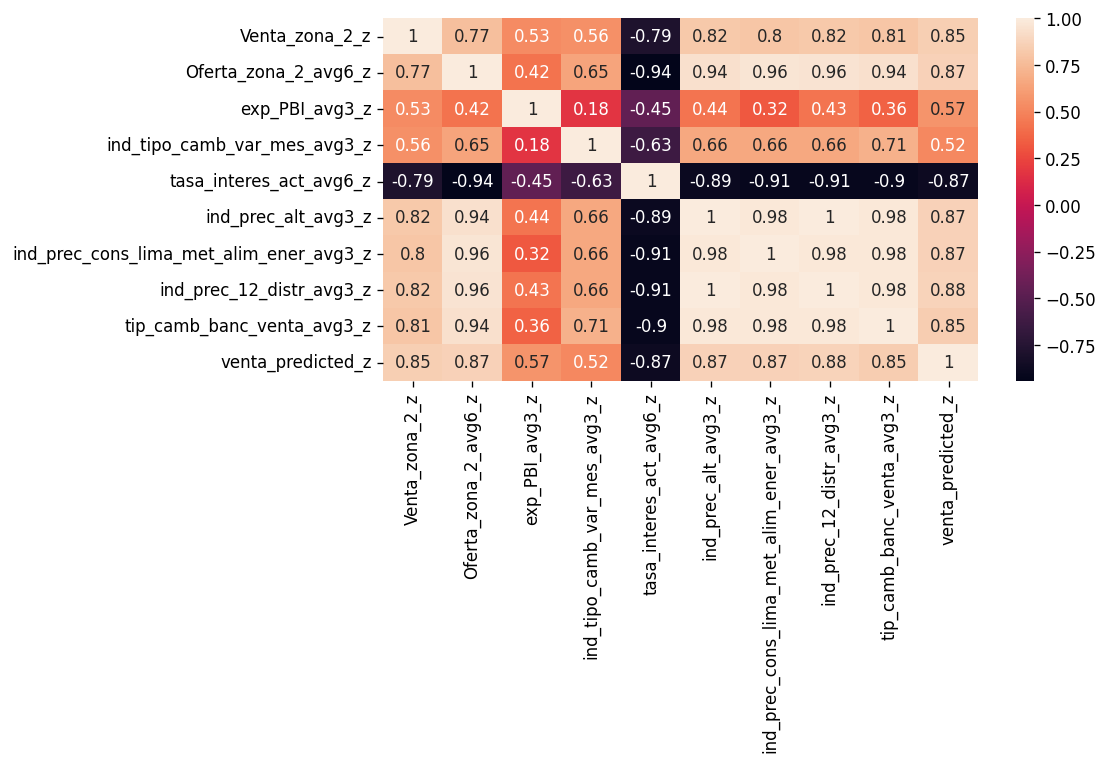

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df['intercept_z'] = 1
df_test['intercept_z'] = 1


In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(df.Venta_zona_3_z, df[[x for x in df.columns.tolist() if '_z' in x[-2:]]].drop(columns=['Venta_zona_3_z', 
                                                                     'Oferta_zona_3_avg6_z',
                                                                     'ind_prec_12_distr_avg3_z',
                                                                     'venta_predicted_z']))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Venta_zona_3_z   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     5.627
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           9.84e-06
Time:                        05:11:11   Log-Likelihood:                -35.616
No. Observations:                  52   AIC:                             111.2
Df Residuals:                      32   BIC:                             150.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
mod = sm.OLS(df.Venta_zona_3_z, df[[x for x in df.columns.tolist() if '_z' in x[-2:]]].drop(columns=['Venta_zona_3_z', 
                                                                     'Oferta_zona_3_avg6_z',
                                                                     'ind_prec_12_distr_avg3_z',
                                                                     'tip_camb_banc_venta_avg3_z',
                                                                     'venta_predicted_z']))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Venta_zona_3_z   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     6.125
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           3.84e-06
Time:                        05:11:53   Log-Likelihood:                -35.616
No. Observations:                  52   AIC:                             109.2
Df Residuals:                      33   BIC:                             146.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
mod = sm.OLS(df.Venta_zona_3_z, df[[x for x in df.columns.tolist() if '_z' in x[-2:]]].drop(columns=['Venta_zona_3_z', 
                                                                     'Oferta_zona_3_avg6_z',
                                                                     'ind_prec_12_distr_avg3_z',
                                                                     'tip_camb_banc_venta_avg3_z',
                                                                     'precio_venta_total_rat3to6_z',
                                                                     'venta_predicted_z']))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Venta_zona_3_z   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     6.675
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.45e-06
Time:                        05:12:17   Log-Likelihood:                -35.635
No. Observations:                  52   AIC:                             107.3
Df Residuals:                      34   BIC:                             142.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
mod = sm.OLS(df.Venta_zona_3_z, df[[x for x in df.columns.tolist() if '_z' in x[-2:]]].drop(columns=['Venta_zona_3_z', 
                                                                     'Oferta_zona_3_avg6_z',
                                                                     'ind_prec_12_distr_avg3_z','flg_feia_avg3_z',
                                                                     'tip_camb_banc_venta_avg3_z','ind_prec_med_rat3to6_z',
                                                                     'precio_venta_total_rat3to6_z','ind_prec_alt_avg3_z',
                                                                     'ind_tipo_camb_var_mes_avg6_z',
                                                                     'ind_tipo_camb_var_mes_avg3_z',
                                                                     'tasa_interes_act_avg6_z',
                                                                     'precio_oferta_total_avg6_z',
                                                                     'ind_prec_cons_lima_met_alim_ener_rat3to6_z',
                                                                     'var_porc_PBI_avg6_z',
                                                                     'var_porc_PBI_const_avg6_z',
                                                                     'tasa_interes_act_rat3to6_z',
                                                                     'ind_tipo_camb_var_mes_rat3to6_z',
                                                                     'ind_preci_import_rat3to6_z',
                                                                     'ind_prec_cons_lima_met_alim_ener_avg3_z','exp_PBI_avg3_z',
                                                                     'precio_venta_total_avg3_z']))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Venta_zona_3_z   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     17.90
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.46e-06
Time:                        05:52:48   Log-Likelihood:                -59.526
No. Observations:                  52   AIC:                             125.1
Df Residuals:                      49   BIC:                             130.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
venta_pred

In [ ]:
df['venta_predicted_final_z'] = 0.5216*df.venta_predicted_z + 0.2561*df.ind_prec_inf_suby_bienes_avg3_z -4.857e-17
df_test['venta_predicted_final_z'] = 0.5216*df_test.venta_predicted_z + 0.2561*df_test.ind_prec_inf_suby_bienes_avg3_z -4.857e-17


In [ ]:
df[['venta_predicted_final_z', 'Venta_zona_3_z']].corr()

,venta_predicted_final_z,Venta_zona_3_z
venta_predicted_final_z,1.000000,0.649714
Venta_zona_3_z,0.649714,1.000000


In [ ]:
df[['venta_predicted_z', 'Venta_zona_3_z']].corr()

,venta_predicted_z,Venta_zona_3_z
venta_predicted_z,1.000000,0.602546
Venta_zona_3_z,0.602546,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


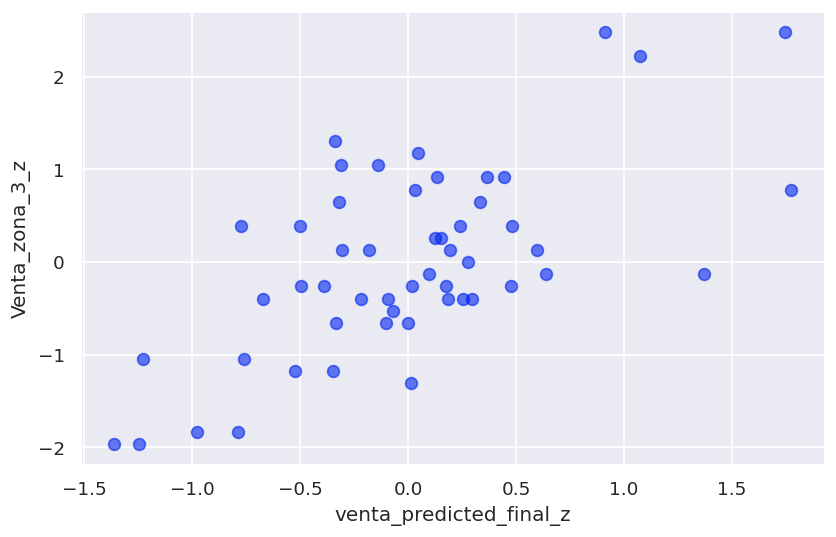

In [ ]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_palette('winter')

df.plot(kind="scatter", x="venta_predicted_final_z", y="Venta_zona_3_z", alpha=0.6, s=50)

In [ ]:
mod = sm.OLS(df.Venta_zona_3, df[['venta_predicted_final_z', 'intercept_z']])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Venta_zona_3   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     36.52
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.87e-07
Time:                        05:56:01   Log-Likelihood:                -165.28
No. Observations:                  52   AIC:                             334.6
Df Residuals:                      50   BIC:                             338.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
venta_predicted_final_z   

In [ ]:
df['venta_predicted_escalado'] = 7.6430*df.venta_predicted_final_z + 16.0192
df_test['venta_predicted_escalado'] = 7.6430*df_test.venta_predicted_final_z + 16.0192


In [ ]:
df_test[['codmes','venta_predicted_escalado', 'Venta_zona_3']].to_csv('results_zona3.csv', index=0)

In [ ]:
df_test[['codmes','venta_predicted','ind_prec_inf_suby_bienes_avg3',
         'venta_predicted_z','ind_prec_inf_suby_bienes_avg3_z',
         'venta_predicted_final_z',
         'venta_predicted_escalado', 'Venta_zona_3']]

,codmes,venta_predicted,ind_prec_inf_suby_bienes_avg3,venta_predicted_z,ind_prec_inf_suby_bienes_avg3_z,venta_predicted_final_z,venta_predicted_escalado,Venta_zona_3
0,sept-17,22.858043,0.157910,0.951559,-0.083665,0.474906,19.648910,14
1,oct-17,16.162916,0.145841,-0.072116,-0.216780,-0.093133,15.307384,13
2,nov-17,14.424915,0.108181,-0.337854,-0.632113,-0.338109,13.435035,26
3,dic-17,23.184649,0.079191,1.001496,-0.951832,0.278616,18.148664,16
4,ene-18,21.555650,0.074156,0.752425,-1.007368,0.134478,17.047014,23
5,feb-18,22.037193,0.081172,0.826052,-0.929990,0.192698,17.491992,17
6,mar-18,20.765539,0.060841,0.631618,-1.154212,0.033858,16.277979,22
7,abr-18,21.568290,0.042594,0.754358,-1.355449,0.046342,16.373395,25
8,may-18,25.620744,0.042035,1.373972,-1.361611,0.367955,18.831480,23
9,jun-18,25.443517,0.086686,1.346874,-0.869172,0.479935,19.687340,19


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


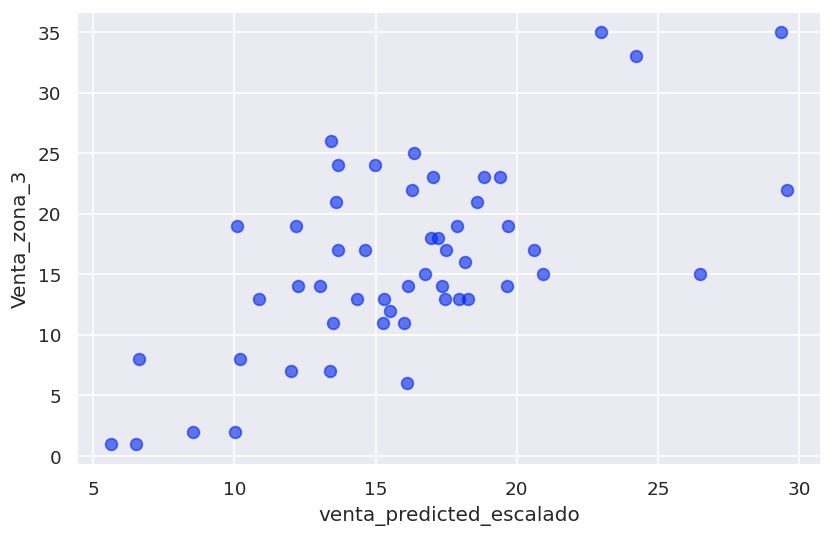

In [ ]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_palette('winter')

df.plot(kind="scatter", x="venta_predicted_escalado", y="Venta_zona_3", alpha=0.6, s=50)

In [ ]:
df[['venta_predicted_escalado', 'Venta_zona_3']].corr()

,venta_predicted_escalado,Venta_zona_3
venta_predicted_escalado,1.000000,0.649714
Venta_zona_3,0.649714,1.000000
